In [1]:
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, Lasso

r2 score for test data 0.1322393572863243
r2 score for train data 0.11897564419199502
mean value is  -32.165679043757414
standard deviation is  64.19587613371371
r2 score for test data 0.12709973634292626
r2 score for train data 0.11840694681550124
mean value is  -30.940224940907843
standard deviation is  61.7849835840589
r2 score for test data 0.13133395026580774
r2 score for train data 0.11893218460259469
mean value is  -32.09179193274524
standard deviation is  64.04999028018342


/usr/local/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid 

r2 score for test data 0.26658425025479016
r2 score for train data 0.37906765088673544
mean value is  -0.046275270909539735
standard deviation is  0.3834251607244231


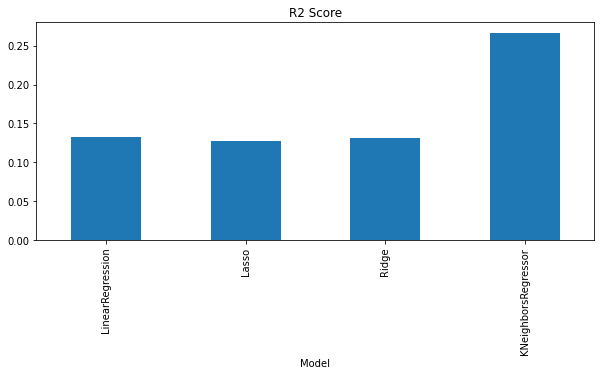

In [78]:
df=pd.read_csv('data_3.csv')
df2 = df

# removing comma from sale price and downsizing it by dividing by 1000
df.iloc[:,18] = df.iloc[:,18].replace(",", "", regex=True)
df.iloc[:,18] = df.iloc[:,18].apply(lambda x: int(x) / 1000) 
df.iloc[:,13] = df.iloc[:,13].replace(",", "", regex=True)

y = df['SALE_PRICE']

df3 = df2[['LAND_SQUARE_FEET', 'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'BUILDING_CLASS_AT_PRESENT', 'TAX_CLASS_AT_TIME_OF_SALE']].copy()

# converting LAND_SQUARE_FEET from string to int
df3.iloc[:,1] = df3.iloc[:,1].replace(",", "", regex=True)
df3['LAND_SQUARE_FEET'] = df3['LAND_SQUARE_FEET'].apply(lambda x: int(x))

# calculating age of house at the time of sale
Age = pd.DatetimeIndex(df['SALE_DATE']).year - df['YEAR_BUILT']
df3['Age'] = Age

# mapping string code to int code to use TAX_CLASS_AT_PRESENT feature for regression
tax_class = df["TAX_CLASS_AT_PRESENT"].replace({"1B": "5", "2A": "6", "2B": "7"})
df3['TAX_CLASS'] = tax_class

# Function to covert string to its ascii integer
def str_to_code(x):
    temp = ''
    for j in range(len(x)):
        if x[j] >= '0' and x[j] <= '9':
            temp = temp + str(ord(x[j]) - 48)
        else:
            temp = temp + str(ord(x[j]) - 64)
    return temp

# mapping string code to int code to use BUILDING_CLASS_AT_PRESENT feature for regression
df3['BUILDING_CLASS_AT_PRESENT'] = df3['BUILDING_CLASS_AT_PRESENT'].apply(lambda x: (str_to_code(x)))


fold = KFold(n_splits=5) # Number of validation set k folds 1:5 ratio

# Splitting dataset into 70 30 ratio.
X_train, X_test, y_train, y_test = train_test_split(df3,y, test_size=0.2)

models = [LinearRegression(), Lasso(alpha=50), Ridge(alpha=50), KNeighborsRegressor(n_neighbors=10)]

Temp_df = pd.DataFrame()
temp_dict = {}

for model in models:
    model_name = str(model)
    temp_dict['Model'] = model_name[:model_name.index('(')]
    model.fit(X_train, y_train)
    temp_dict['R2_Score'] = r2_score(y_test, model.predict(X_test))
    result = model_selection.cross_val_score(model, df3, y, cv=fold)
    print('r2 score for test data',r2_score(y_test, model.predict(X_test)))
    print('r2 score for train data',r2_score(y_train, model.predict(X_train)))
    print("mean value is ", result.mean())
    print("standard deviation is ", result.std())
    Temp_df = Temp_df.append([temp_dict])

Temp_df.set_index('Model', inplace=True)
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
Temp_df.R2_Score.plot(ax=axes, kind='bar', title='R2 Score')
plt.show()

mean values are [-27.519089745555544, -30.940224940907843, -32.01806669678817, -32.15090034271415, -32.16420098465484, -32.16566426295399, -32.16567756568713, -32.165678304722874]
standard deviation are [54.90478232005855, 61.7849835840589, 63.90521268784079, 64.16678055091262, 64.19296625509108, 64.19584703456708, 64.19587322381832, 64.19587467876704]


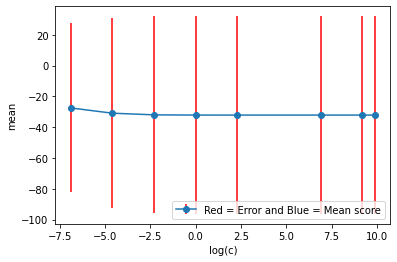

In [66]:
import matplotlib.pyplot as plt1
c = [0.001, 0.01, 0.1, 1, 10, 1000, 10000, 20000]
alpha_lasso = []
folds = model_selection.KFold(n_splits=5)
for a in c:
    alpha_lasso.append(1/(2*a))


mean = []
standard_deviation = [] 
for i in alpha_lasso:
    model = Lasso(alpha=i) # Lasso regression 
    result = model_selection.cross_val_score(model, df3, y, cv=folds)
    mean.append(result.mean())
    standard_deviation.append(result.std())
print(f'mean values are {mean}')
print(f'standard deviation are {standard_deviation}')
plt1.errorbar(np.log(c), mean, yerr=standard_deviation, fmt='o-', ecolor='red')
plt1.legend(["Red = Error and Blue = Mean score"], loc=4)
plt1.xlabel("log(c)")
plt1.ylabel("mean")
plt1.show()


mean values are [-31.58724008227726, -32.09179193274523, -32.15807215581207, -32.164916094109266, -32.1656027261021, -32.16567828055598, -32.1656789674373, -32.1656790055974]
standard deviation are [63.05811798400648, 64.04999028018341, 64.18084745194847, 64.19436870097131, 64.19572534462422, 64.19587462577256, 64.19587598291962, 64.19587605831673]


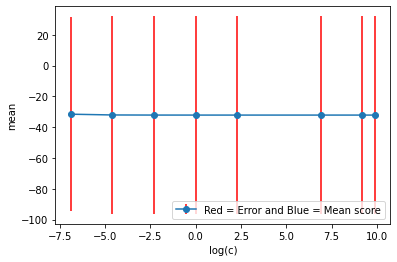

In [10]:
import matplotlib.pyplot as plt1
c = [0.001, 0.01, 0.1, 1, 10, 1000, 10000, 20000]
alpha_ridge = []
folds = model_selection.KFold(n_splits=5)
for a in c:
    alpha_ridge.append(1/(2*a))


mean = []
standard_deviation = []
for i in alpha_ridge:
    model = Ridge(alpha=i) # Ridge Regression
    result = model_selection.cross_val_score(model, df3, y, cv=folds)
    mean.append(result.mean())
    standard_deviation.append(result.std())
print(f'mean values are {mean}')
print(f'standard deviation are {standard_deviation}')
plt1.errorbar(np.log(c), mean, yerr=standard_deviation, fmt='o-', ecolor='red')
plt1.legend(["Red = Error and Blue = Mean score"], loc=4)
plt1.xlabel("log(c)")
plt1.ylabel("mean")
plt1.show()


3
6
10


/usr/local/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid 

20
mean values are [-0.2895477466523696, -0.09048376709398195, -0.046275270909539735, -0.1817216731662406]
standard deviation are [0.588055271980789, 0.41225316327063716, 0.3834251607244231, 0.7069444878544059]


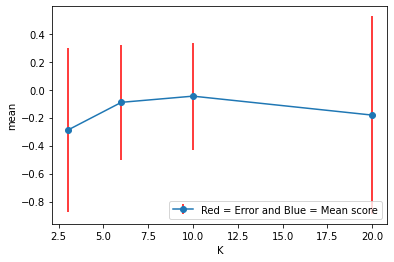

In [77]:
import matplotlib.pyplot as plt1
alpha_ridge = []
folds = model_selection.KFold(n_splits=5)
K = [3, 6, 10, 20]

mean = []
standard_deviation = []
for i in K:
    print(i)
    model = KNeighborsRegressor(n_neighbors=i) #KNeighbour Regression
    model.fit(X_train, y_train)
    result = model_selection.cross_val_score(model, df3, y, cv=folds)
    mean.append(result.mean())
    standard_deviation.append(result.std())
print(f'mean values are {mean}')
print(f'standard deviation are {standard_deviation}')
plt1.errorbar(K, mean, yerr=standard_deviation, fmt='o-', ecolor='red')
plt1.legend(["Red = Error and Blue = Mean score"], loc=4)
plt1.xlabel("K")
plt1.ylabel("mean")
plt1.show()
